In [1]:
import numpy as np
import string
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('qald-8-train.csv')
df_test = pd.read_csv('qald-8-test.csv')

In [4]:
df_train.head()

,questions,lang
0,List all the musicals with music by Elton John.,en
1,Liste alle Musicals mit Musik von Elton John auf.,de
2,Dame todos los musicales con música de Elton J...,es
3,Elenca tutti i musicals con musiche di Elton J...,it
4,Donne-moi tous les musicals avec de la musique...,fr


In [5]:
df_train.shape

(1798, 2)

In [6]:
df_test.head()

,questions,lang
0,What is the alma mater of the chancellor of Ge...,en
1,How large is the area of UK?,en
2,Who is the author of the interpretation of dre...,en
3,What is the birth name of Adele?,en
4,What are the top selling luxury vehicle brands...,en


In [7]:
df_test=df_test.dropna(subset=['questions'])

In [8]:
df_test.shape

(41, 2)

In [9]:
df_train["lang"].unique()

array(['en', 'de', 'es', 'it', 'fr', 'nl', 'hi_IN', 'ro', 'fa'],
      dtype=object)

In [10]:
# English, German, Spanish, Italian, French, Dutch, Romanian
# {'en': 0, 'de': 1, 'es': 2, 'it': 3, 'fr': 4, 'nl': 5, 'ro': 6}

In [11]:
columns = ['hi_IN','fa']
for col in columns:
    df_train = df_train[df_train.lang!=col]
    df_test = df_test[df_test.lang!=col]

In [12]:
df_train = df_train.dropna()

In [13]:
df_train.isnull().sum()

questions    0
lang         0
dtype: int64

In [14]:
df = pd.concat([df_test, df_train], ignore_index=True)

In [15]:
df.shape

(1420, 2)

In [16]:
def preprocess(text):
    
    translation_table = str.maketrans('\n', ' ', string.punctuation+string.digits)
    
    preprocessed_text = text.translate(translation_table)
    preprocessed_text = text.lower().replace('-', ' ')
    return preprocessed_text

In [17]:
df['questions'] = [preprocess(text) for text in df['questions'].values]

In [18]:
df.head()

,questions,lang
0,what is the alma mater of the chancellor of ge...,en
1,how large is the area of uk?,en
2,who is the author of the interpretation of dre...,en
3,what is the birth name of adele?,en
4,what are the top selling luxury vehicle brands...,en


In [19]:
vectorizer = CountVectorizer()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df['questions'],
    df['lang'],
    test_size=0.20,
    shuffle=True,
    stratify=df['lang'],
    random_state=7
)

In [22]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [23]:
X_train

<1136x2473 sparse matrix of type '<class 'numpy.int64'>'
	with 8023 stored elements in Compressed Sparse Row format>

In [24]:
naive_classifier = MultinomialNB(fit_prior=False,alpha=0.01)
naive_classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.01, fit_prior=False)

In [25]:
predictions = naive_classifier.predict(X_test)

In [26]:
# 0.9225352112676056

In [27]:
accuracy_score(y_test, predictions)

0.9225352112676056

In [28]:
y_train.unique()

array(['it', 'es', 'de', 'en', 'fr', 'ro', 'nl'], dtype=object)

In [29]:
y_test.unique()

array(['fr', 'nl', 'en', 'de', 'es', 'it', 'ro'], dtype=object)

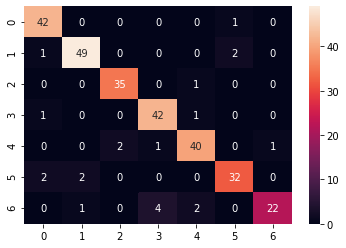

In [30]:
cm = confusion_matrix(y_test,predictions)
sns.heatmap(cm,annot=True,fmt="d");